# Load the libraries

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from category_encoders import OneHotEncoder
import dash
from dash import dcc, html, Input, Output
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler,LabelEncoder
from imblearn.over_sampling import SMOTE
import folium
from geopy.geocoders import Nominatim
import time
from IPython.display import display

# Data Inspection:

In [45]:
df = pd.read_csv("Amazon Sale Report.csv", encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)

df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_25856\3558306127.py:1: DtypeWarning:

Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.



index             Order ID      Date                        Status  \
0    0.0  405-8078784-5731545  04-30-22                     Cancelled   
1    1.0  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2    2.0  404-0687676-7273146  04-30-22                       Shipped   
3    3.0  403-9615377-8133951  04-30-22                     Cancelled   
4    4.0  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category Size        ASIN Courier Status  Qty currency  Amount  \
0            Set    S  B09KXVBD7Z            NaN  0.0      INR  647.62   
1          kurta  3XL  B09K3WFS32        Shipped  1.0      INR  406.00   
2          kurta   XL  B07WV4JV4D        Shipped  1.0      INR  329.00   
3  Western Dress    L  B099NRCT7B            NaN  0.0      INR  753.33   
4            Top  3XL  B098714BZP        Shipped  1.0      INR  574.00   

     ship-city   ship-state  ship-postal-code ship-country  \
0       MUMBAI  MAHARASHTRA          400081.0           IN   
1    BENGALURU    KARNATAKA          560085.0           IN   
2  NAVI MUMBAI  MAHARASHTRA          410210.0           IN   
3   PUDUCHERRY   PUDUCHERRY          605008.0           IN   
4      CHENNAI   TAMIL NADU          600073.0           IN   

                                       promotion-ids    B2B fulfilled-by  \
0                                                NaN  False    Easy Ship   
1  Amazon PLCC Free-Financing Universal Merchant ...  False    Easy Ship   
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True          NaN   
3                                                NaN  False    Easy Ship   
4                                                NaN  False          NaN   

  Unnamed: 22  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128977 entries, 0 to 128976
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  float64
 1   Order ID            128977 non-null  object 
 2   Date                128977 non-null  object 
 3   Status              128977 non-null  object 
 4   Fulfilment          128977 non-null  object 
 5   Sales Channel       128977 non-null  object 
 6   ship-service-level  128977 non-null  object 
 7   Style               128977 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  float64
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

### Finding the null value of each column

In [47]:
df.isnull().sum()

index                     2
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       2
Category                  2
Size                      2
ASIN                      2
Courier Status         6874
Qty                       2
currency               7797
Amount                 7797
ship-city                35
ship-state               37
ship-postal-code         37
ship-country             37
promotion-ids         49157
B2B                       4
fulfilled-by          89702
Unnamed: 22           49054
dtype: int64

In [48]:
round(df.isnull().sum()*100/df["Order ID"].count(),4)

index                  0.0016
Order ID               0.0000
Date                   0.0000
Status                 0.0000
Fulfilment             0.0000
Sales Channel          0.0000
ship-service-level     0.0000
Style                  0.0000
SKU                    0.0016
Category               0.0016
Size                   0.0016
ASIN                   0.0016
Courier Status         5.3296
Qty                    0.0016
currency               6.0453
Amount                 6.0453
ship-city              0.0271
ship-state             0.0287
ship-postal-code       0.0287
ship-country           0.0287
promotion-ids         38.1130
B2B                    0.0031
fulfilled-by          69.5488
Unnamed: 22           38.0331
dtype: float64

### Summary statistics for numerical variables

In [49]:
df.describe()

index            Qty         Amount  ship-postal-code
count  128975.000000  128975.000000  121180.000000     128940.000000
mean    64487.000000       0.904431     648.561465     463969.927594
std     37232.019822       0.313354     281.211687     191475.956294
min         0.000000       0.000000       0.000000     110001.000000
25%     32243.500000       1.000000     449.000000     382421.000000
50%     64487.000000       1.000000     605.000000     500033.000000
75%     96730.500000       1.000000     788.000000     600024.000000
max    128974.000000      15.000000    5584.000000     989898.000000

### Printing the value counts on each columns

In [50]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print(f"Number of null values in column '{column}': {df[column].isnull().sum()}")
    print("\n")


Value counts for column 'index':
0.0         1
85979.0     1
85992.0     1
85991.0     1
85990.0     1
           ..
42986.0     1
42985.0     1
42984.0     1
42983.0     1
128974.0    1
Name: index, Length: 128975, dtype: int64
Number of null values in column 'index': 2


Value counts for column 'Order ID':
171-5057375-2831560    12
403-4984515-8861958    12
403-0173977-3041148    11
404-9932919-6662730    11
408-3317403-1729937    10
                       ..
407-8086623-5674716     1
403-2697348-7766749     1
405-0271223-6692335     1
406-7498475-4257161     1
408-7436540-8728312     1
Name: Order ID, Length: 120379, dtype: int64
Number of null values in column 'Order ID': 0


Value counts for column 'Date':
05-03-22    2085
05-02-22    2079
05-04-22    2015
04-14-22    1883
04-15-22    1853
            ... 
06-24-22    1028
06-25-22    1026
06-29-22     658
03-31-22     171
226002.0       2
Name: Date, Length: 92, dtype: int64
Number of null values in column 'Date': 0


Value count

### Finding  correleration between each column to know if their any colinearity

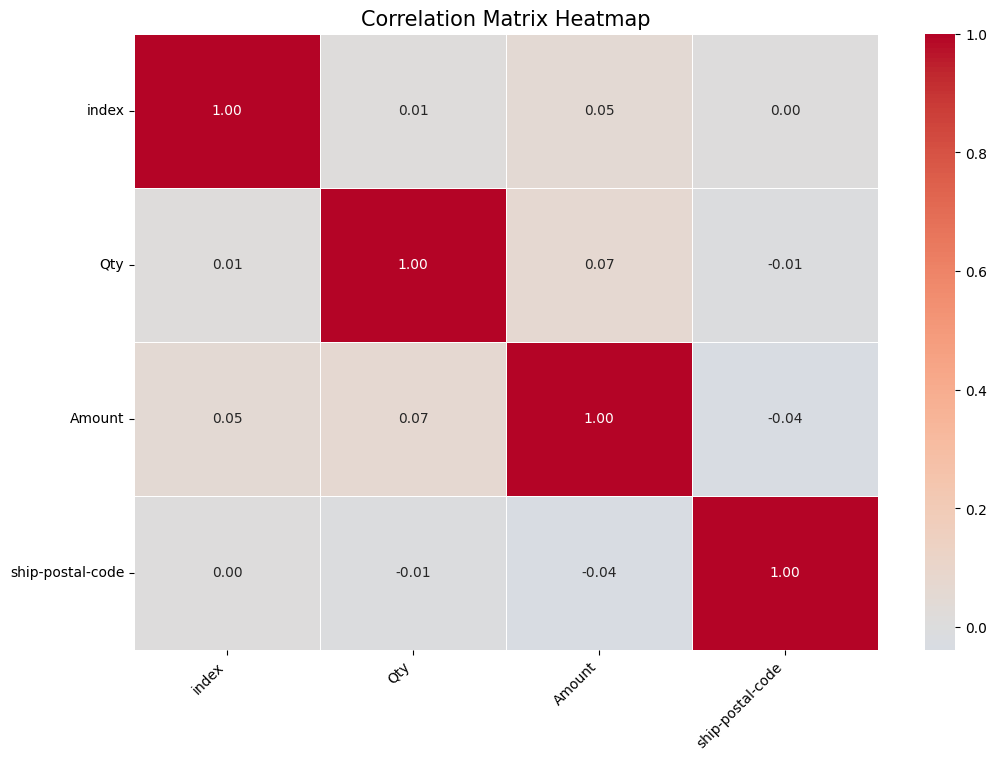

In [51]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix Heatmap', size=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Data Cleaning

### start be filling the missing value if numeric be mean and if catgorical be mode

In [52]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())


cat_cols = df.select_dtypes(include=['object',"bool","datetime64[ns]","period[M]"]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128977 entries, 0 to 128976
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128977 non-null  float64
 1   Order ID            128977 non-null  object 
 2   Date                128977 non-null  object 
 3   Status              128977 non-null  object 
 4   Fulfilment          128977 non-null  object 
 5   Sales Channel       128977 non-null  object 
 6   ship-service-level  128977 non-null  object 
 7   Style               128977 non-null  object 
 8   SKU                 128977 non-null  object 
 9   Category            128977 non-null  object 
 10  Size                128977 non-null  object 
 11  ASIN                128977 non-null  object 
 12  Courier Status      128977 non-null  object 
 13  Qty                 128977 non-null  float64
 14  currency            128977 non-null  object 
 15  Amount              128977 non-nul

### Drop duplicate if there any

In [54]:
df.drop_duplicates(inplace=True)

### Ploting the number of unique value  in each catigorical column  

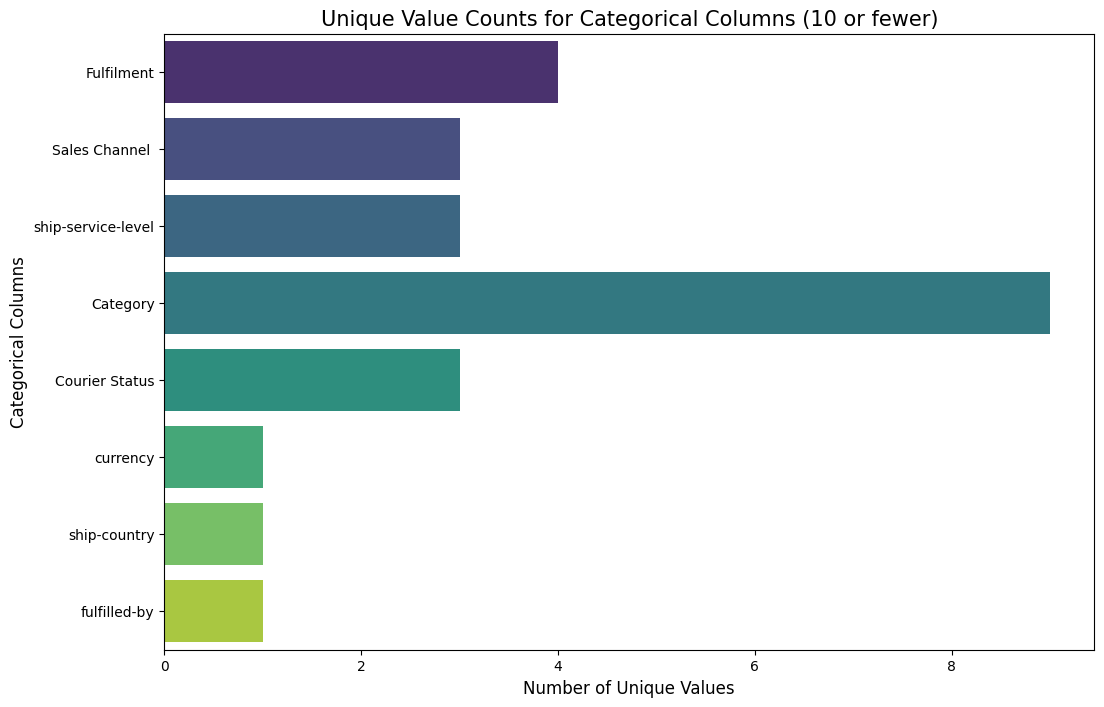

In [55]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

unique_counts = df[categorical_columns].nunique()
filtered_unique_counts = unique_counts[unique_counts <= 10]
unique_counts_df = filtered_unique_counts.reset_index()
unique_counts_df.columns = ['Column', 'UniqueValues']
plt.figure(figsize=(12, 8))
sns.barplot(data=unique_counts_df, x='UniqueValues', y='Column', palette='viridis')
plt.title('Unique Value Counts for Categorical Columns (10 or fewer)', size=15)
plt.xlabel('Number of Unique Values', size=12)
plt.ylabel('Categorical Columns', size=12)
plt.show()

### Droped the column that has 1 unique value

In [56]:
df.drop(columns=["currency","ship-country","fulfilled-by"],inplace=True)

In [57]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'promotion-ids', 'B2B', 'Unnamed: 22'],
      dtype='object')

### Drop the column that has high variance

In [58]:
df.drop(columns=["index","Order ID","Unnamed: 22"],inplace=True)

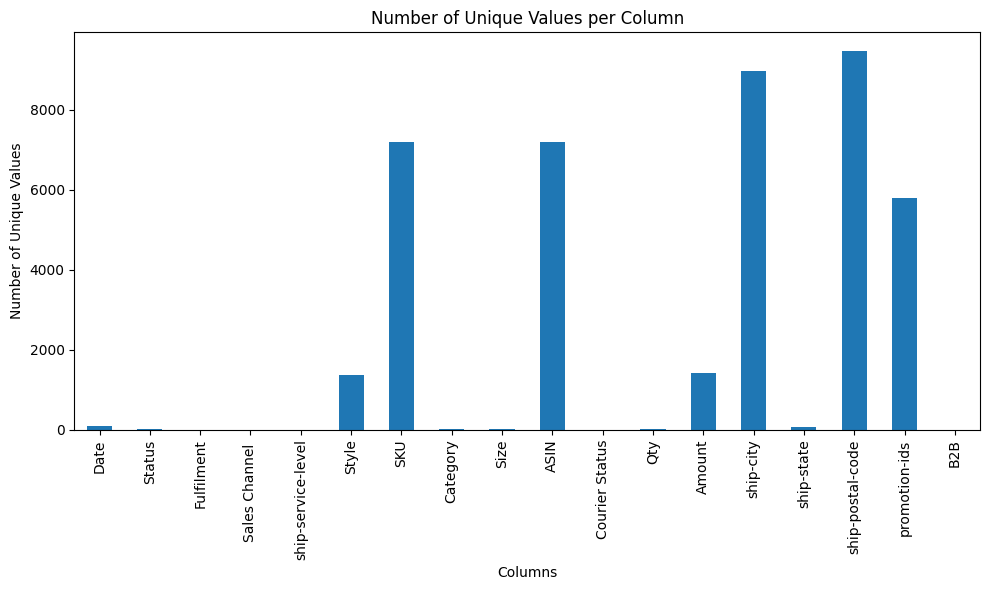

In [59]:
unique_counts = df.nunique()


plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar')
plt.title('Number of Unique Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128977 entries, 0 to 128976
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                128977 non-null  object 
 1   Status              128977 non-null  object 
 2   Fulfilment          128977 non-null  object 
 3   Sales Channel       128977 non-null  object 
 4   ship-service-level  128977 non-null  object 
 5   Style               128977 non-null  object 
 6   SKU                 128977 non-null  object 
 7   Category            128977 non-null  object 
 8   Size                128977 non-null  object 
 9   ASIN                128977 non-null  object 
 10  Courier Status      128977 non-null  object 
 11  Qty                 128977 non-null  float64
 12  Amount              128977 non-null  float64
 13  ship-city           128977 non-null  object 
 14  ship-state          128977 non-null  object 
 15  ship-postal-code    128977 non-nul

# Outlire technique

### Ploting a boxplot for the numerical columns 

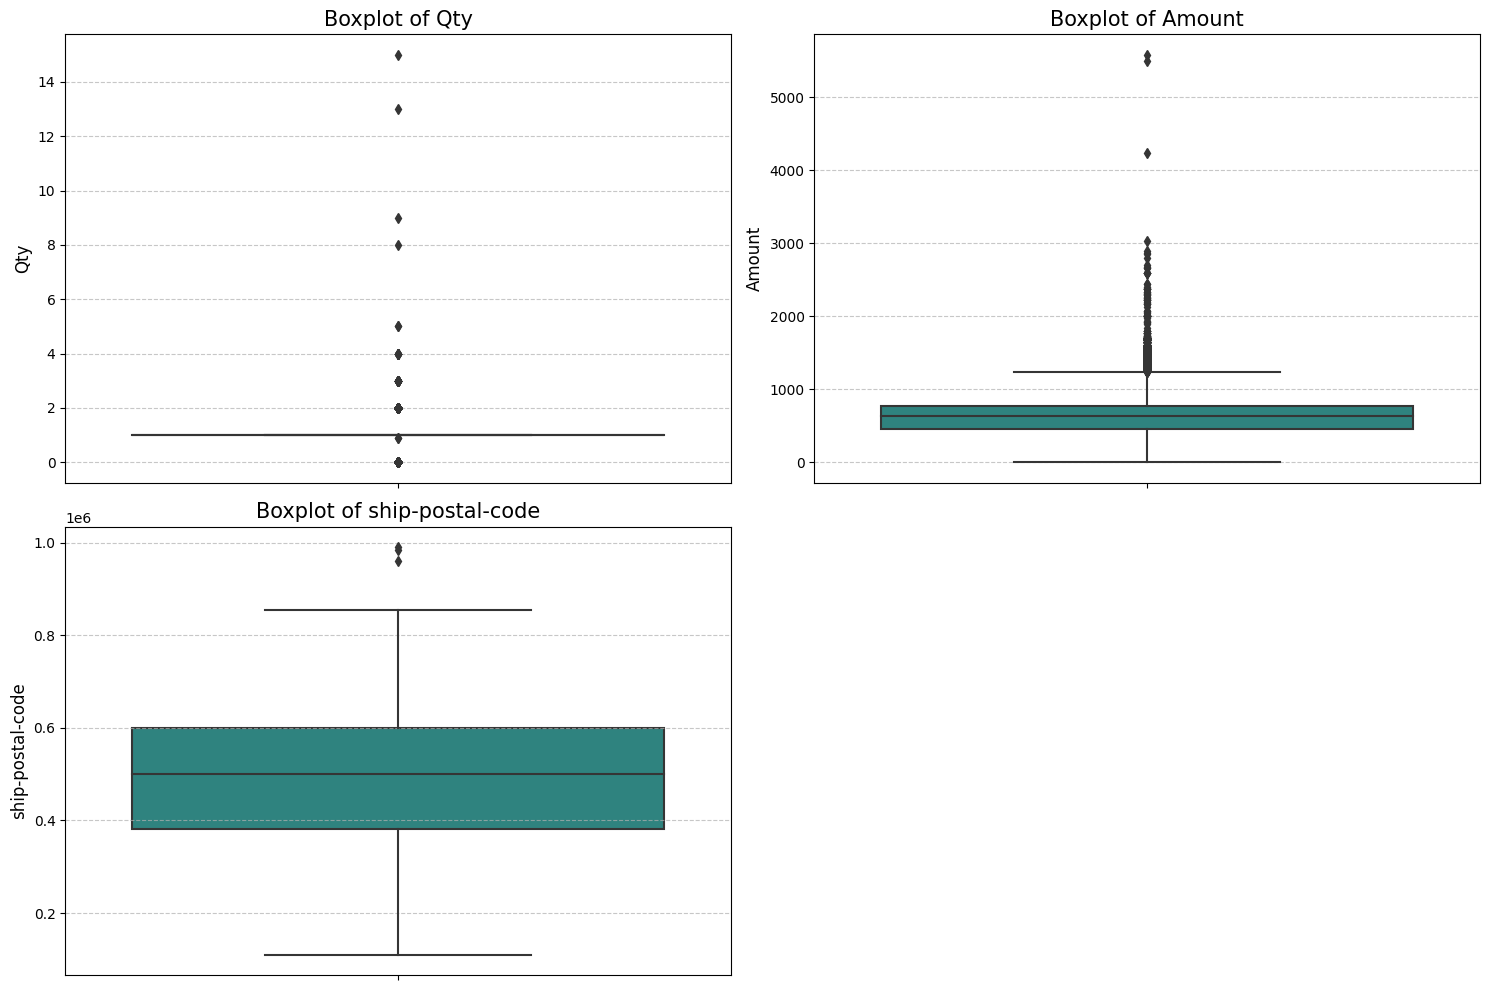

In [61]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

num_cols = len(numeric_columns)
cols = 2  
rows = (num_cols + cols - 1) // cols  
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()
for i, num_col in enumerate(numeric_columns):
    sns.boxplot(data=df, y=num_col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Boxplot of {num_col}', size=15)
    axes[i].set_ylabel(num_col, size=12)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### IQR

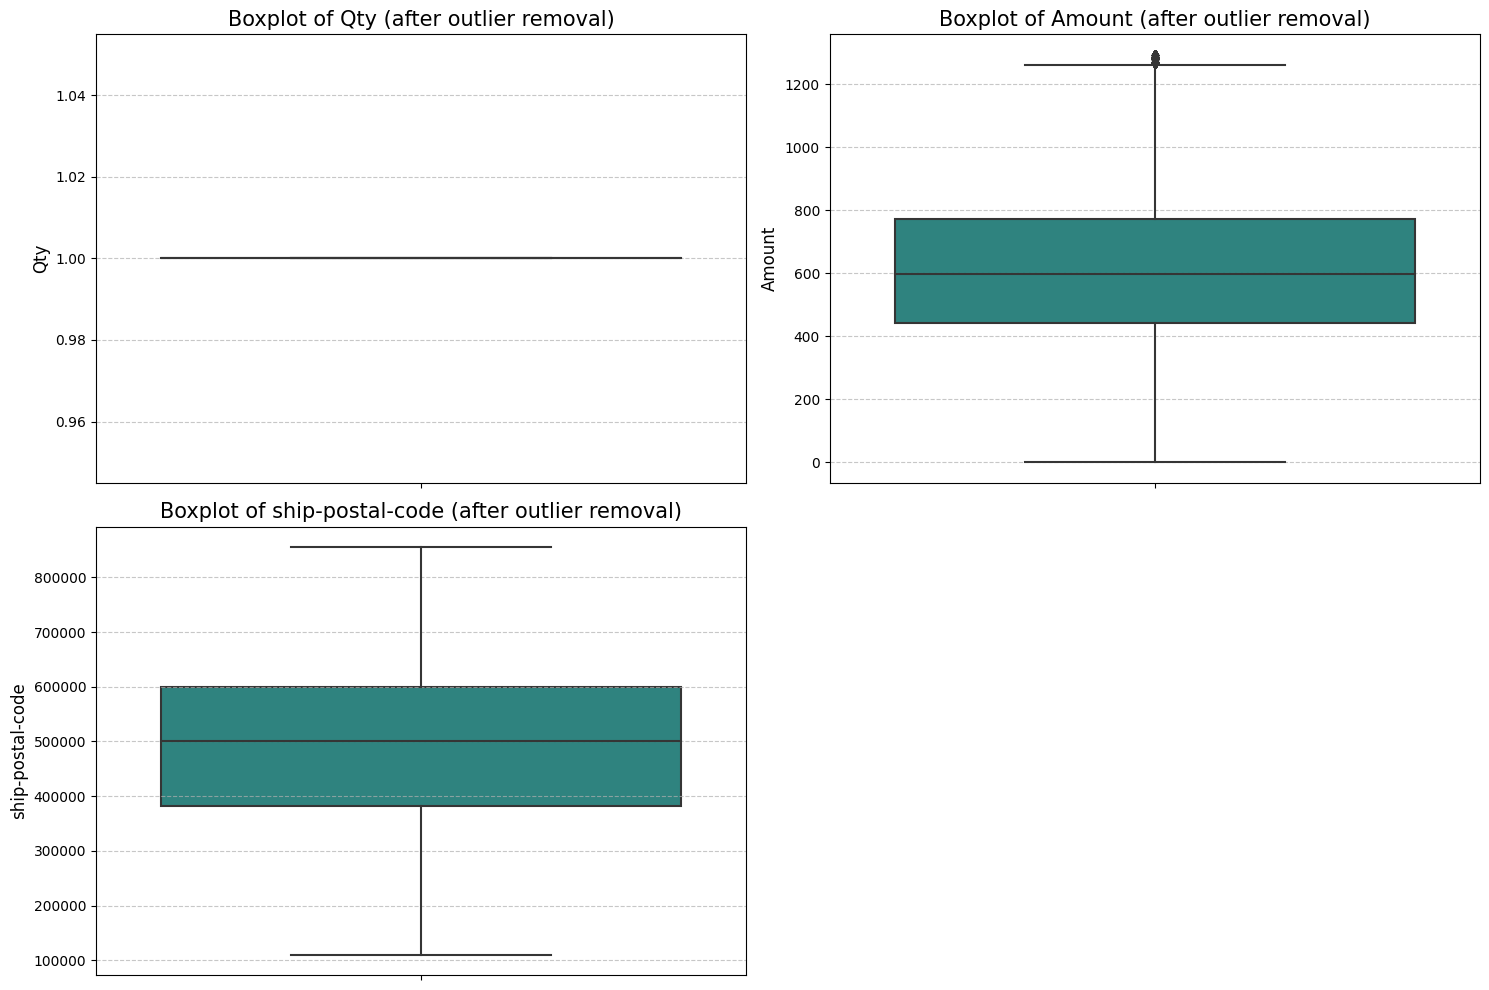

Qty         Amount  ship-postal-code
count  112376.0  112376.000000     112376.000000
mean        1.0     624.356994     463538.499252
std         0.0     247.057867     190552.850435
min         1.0       0.000000     110001.000000
25%         1.0     442.000000     382481.000000
50%         1.0     598.000000     500032.000000
75%         1.0     771.000000     600017.000000
max         1.0    1294.000000     855117.000000

In [62]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
df_clean = remove_outliers(df, numeric_columns)
num_cols = len(numeric_columns)
cols = 2  
rows = (num_cols + cols - 1) // cols  

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()
for i, num_col in enumerate(numeric_columns):
    sns.boxplot(data=df_clean, y=num_col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Boxplot of {num_col} (after outlier removal)', size=15)
    axes[i].set_ylabel(num_col, size=12)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
df_clean.describe()

### Transformation by mutipliying it with log

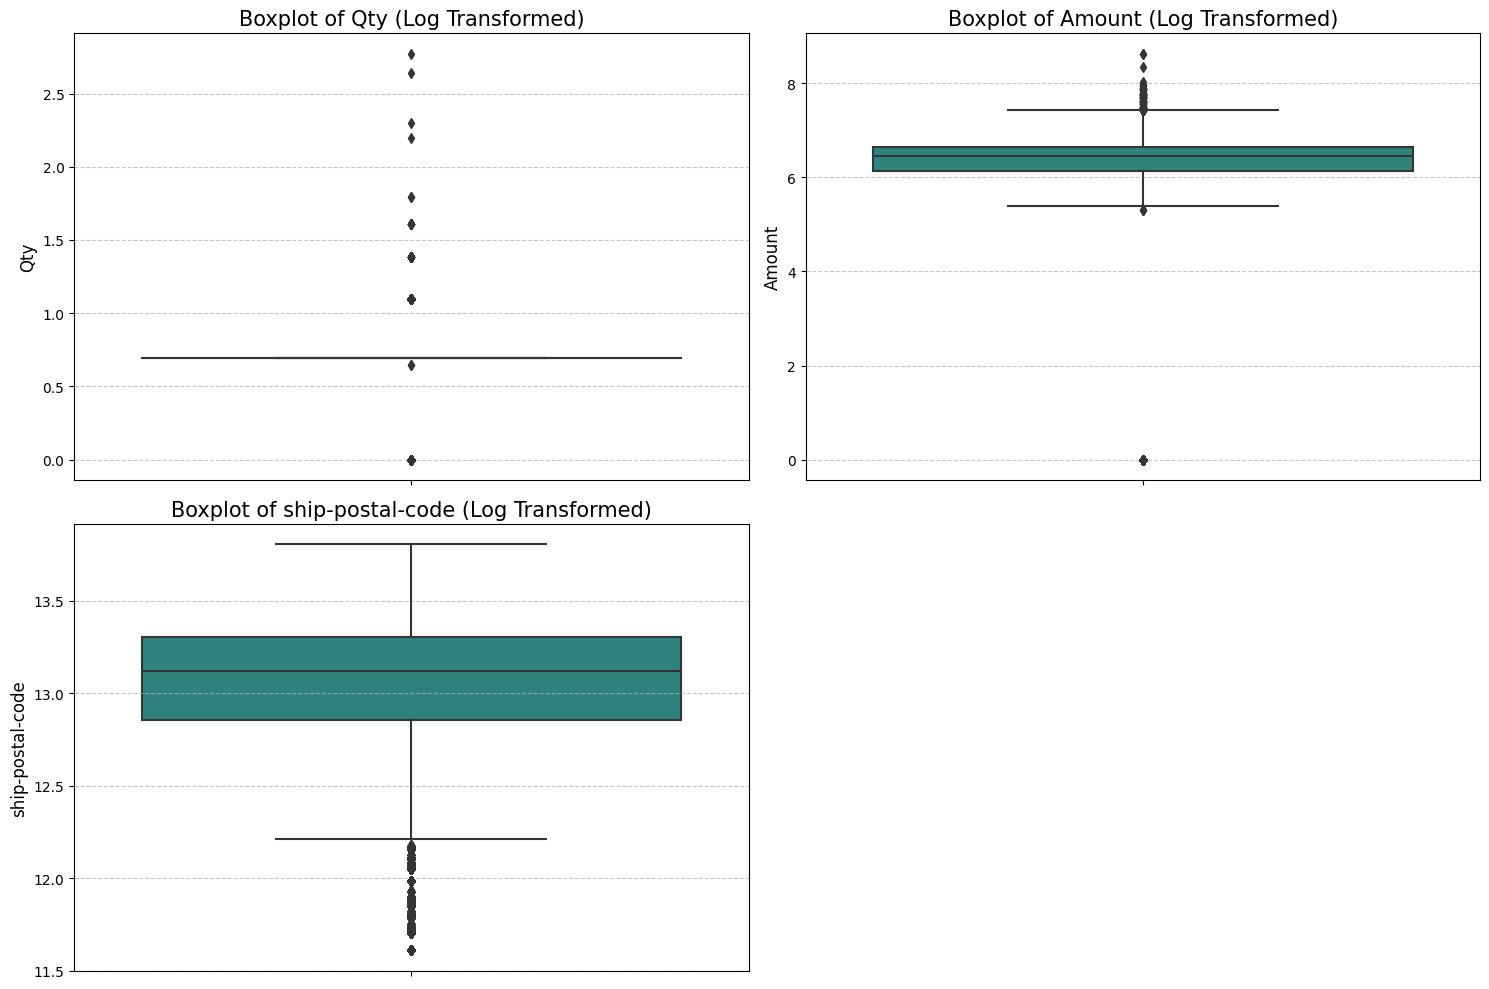

Qty         Amount  ship-postal-code
count  128977.000000  128977.000000     128977.000000
mean        0.625699       6.306363         12.926431
std         0.209500       0.935314          0.547221
min         0.000000       0.000000         11.608254
25%         0.693147       6.131226         12.854280
50%         0.693147       6.455199         13.122431
75%         0.693147       6.648985         13.304727
max         2.772589       8.627840         13.805358

In [63]:


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

df_log_transformed = df.copy()
for col in numeric_columns:
    df_log_transformed[col] = np.log1p(df[col])
num_cols = len(numeric_columns)
cols = 2
rows = (num_cols + cols - 1) // cols 
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()
for i, num_col in enumerate(numeric_columns):
    sns.boxplot(data=df_log_transformed, y=num_col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Boxplot of {num_col} (Log Transformed)', size=15)
    axes[i].set_ylabel(num_col, size=12)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
df_log_transformed.describe()

### Removing the top  5% of the data

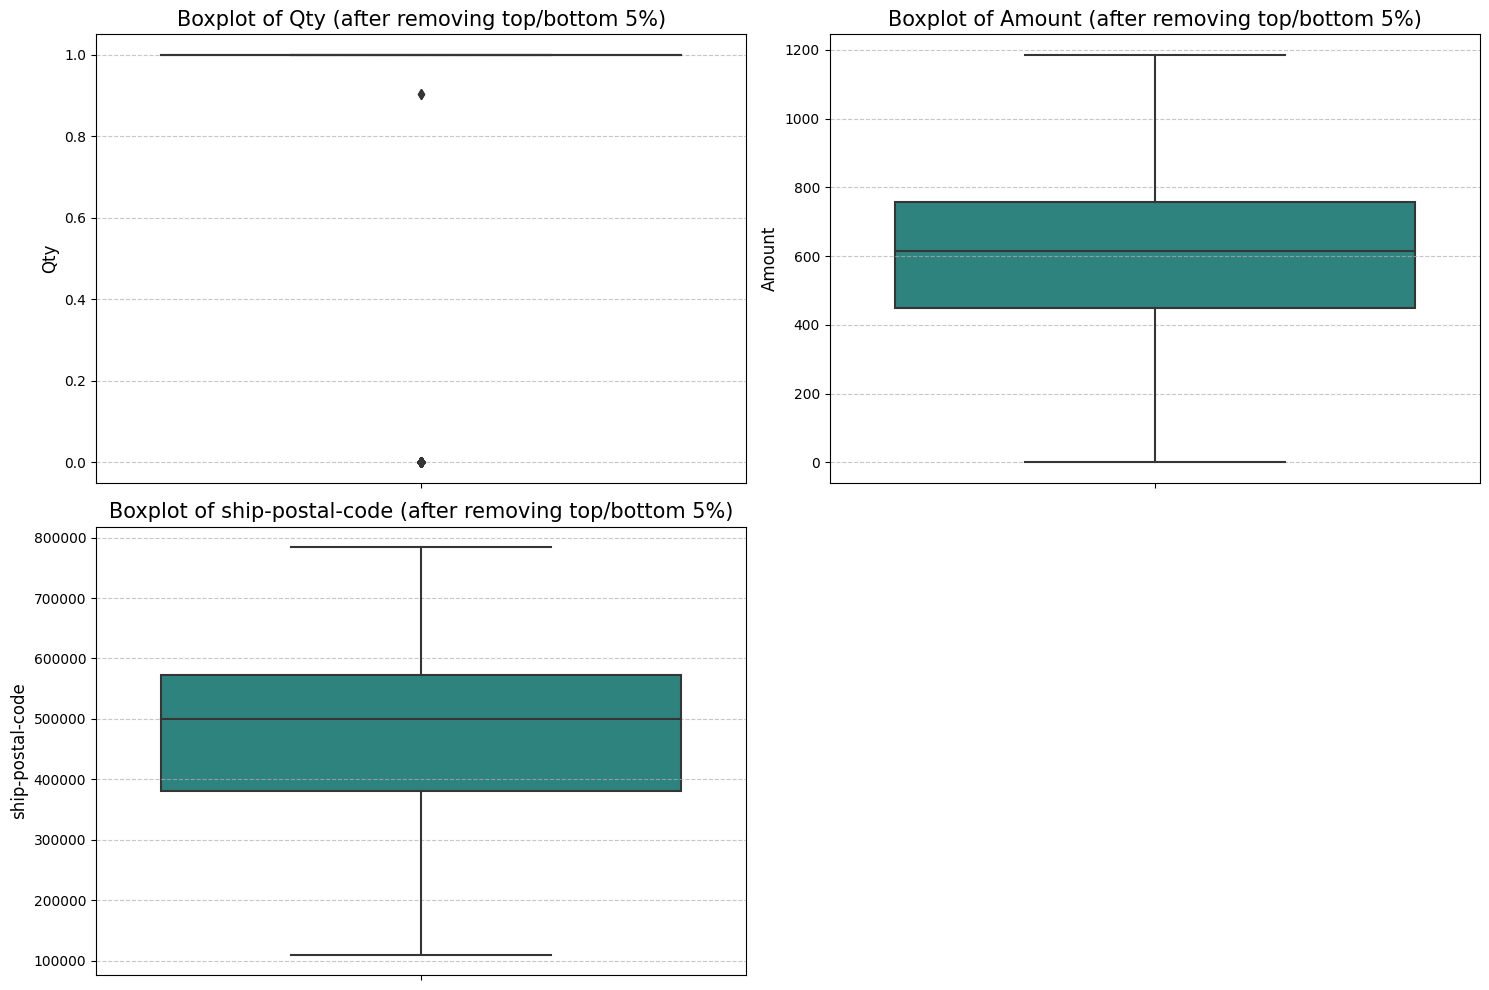

Qty        Amount  ship-postal-code
count  118640.000000  118640.00000     118640.000000
mean        0.897959     616.17301     450001.627499
std         0.302702     229.35672     180712.096113
min         0.000000       0.00000     110001.000000
25%         1.000000     449.00000     380015.000000
50%         1.000000     614.00000     500008.000000
75%         1.000000     758.00000     573201.000000
max         1.000000    1186.00000     784001.000000

In [64]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

def remove_percentiles(df, columns, lower_percentile=0.0, upper_percentile=0.96):
    for col in columns:
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
df_filtered = remove_percentiles(df, numeric_columns)

num_cols = len(numeric_columns)
cols = 2  
rows = (num_cols + cols - 1) // cols  
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()
for i, num_col in enumerate(numeric_columns):
    sns.boxplot(data=df_filtered, y=num_col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Boxplot of {num_col} (after removing top/bottom 5%)', size=15)
    axes[i].set_ylabel(num_col, size=12)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
df_filtered.describe()

In [65]:
df=df_filtered

### Grouped the status variable

In [66]:
status_mapping = {
    'Shipped': 'Shipped',
    'Shipped - Delivered to Buyer': 'Shipped',
    'Shipped - Returned to Seller': 'Shipped',
    'Shipped - Picked Up': 'Shipped',
    'Shipped - Returning to Seller': 'Shipped',
    'Shipped - Out for Delivery': 'Shipped',
    'Shipped - Rejected by Buyer': 'Shipped',
    'Shipping': 'Shipped',
    'Shipped - Lost in Transit': 'Shipped',
    'Shipped - Damaged': 'Shipped',
    'Cancelled': 'Cancelled',
    'Pending': 'Pending',
    'Pending - Waiting for Pick Up': 'Pending',
    'IN': 'IN'
}

df['Status'] = df['Status'].replace(status_mapping)
df['Status'].value_counts()


Shipped      100632
Cancelled     17156
Pending         850
IN                2
Name: Status, dtype: int64

In [67]:
df.head()

Date     Status Fulfilment Sales Channel  ship-service-level    Style  \
0  04-30-22  Cancelled   Merchant      Amazon.in           Standard   SET389   
1  04-30-22    Shipped   Merchant      Amazon.in           Standard  JNE3781   
2  04-30-22    Shipped     Amazon      Amazon.in          Expedited  JNE3371   
3  04-30-22  Cancelled   Merchant      Amazon.in           Standard    J0341   
4  04-30-22    Shipped     Amazon      Amazon.in          Expedited  JNE3671   

               SKU       Category Size        ASIN Courier Status  Qty  \
0   SET389-KR-NP-S            Set    S  B09KXVBD7Z        Shipped  0.0   
1  JNE3781-KR-XXXL          kurta  3XL  B09K3WFS32        Shipped  1.0   
2    JNE3371-KR-XL          kurta   XL  B07WV4JV4D        Shipped  1.0   
3       J0341-DR-L  Western Dress    L  B099NRCT7B        Shipped  0.0   
4  JNE3671-TU-XXXL            Top  3XL  B098714BZP        Shipped  1.0   

   Amount    ship-city   ship-state  ship-postal-code  \
0  647.62       MUMBAI  MAHARASHTRA          400081.0   
1  406.00    BENGALURU    KARNATAKA          560085.0   
2  329.00  NAVI MUMBAI  MAHARASHTRA          410210.0   
3  753.33   PUDUCHERRY   PUDUCHERRY          605008.0   
4  574.00      CHENNAI   TAMIL NADU          600073.0   

                                       promotion-ids    B2B  
0       IN Core Free Shipping 2015/04/08 23-48-5-108  False  
1  Amazon PLCC Free-Financing Universal Merchant ...  False  
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True  
3       IN Core Free Shipping 2015/04/08 23-48-5-108  False  
4       IN Core Free Shipping 2015/04/08 23-48-5-108  False

## Feture enginnering creating sales column

In [68]:
df["Sales"]=df["Qty"]*df["Amount"]

### converting the date to type date time

In [69]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')


# Data visualization

### Plot monthly sales trend

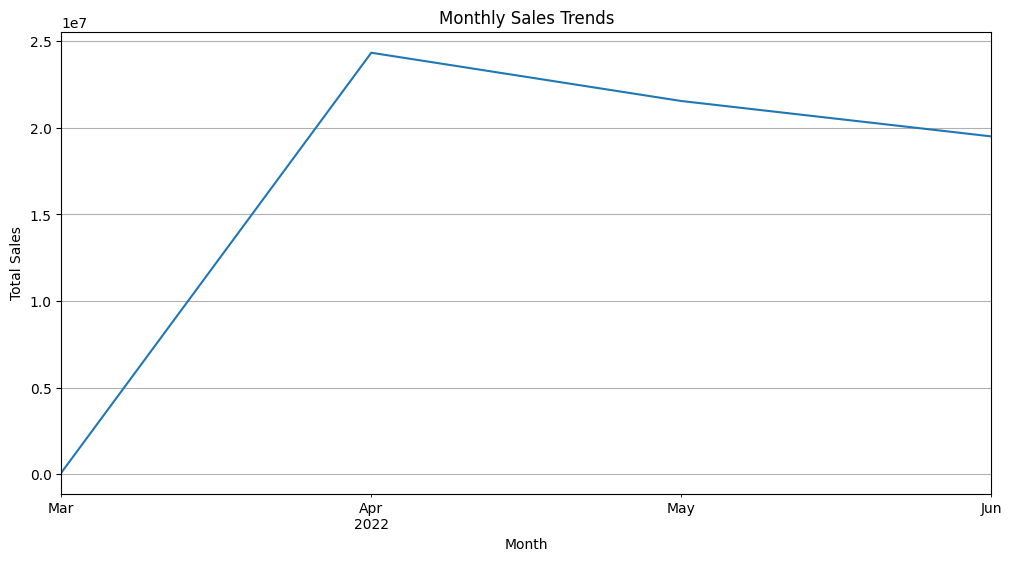

In [70]:
from matplotlib.ticker import ScalarFormatter


df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
ax = monthly_sales.plot(kind='line')

plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show() 

### we found that highest sales time was on april

### Ploting the top 10 sales categories

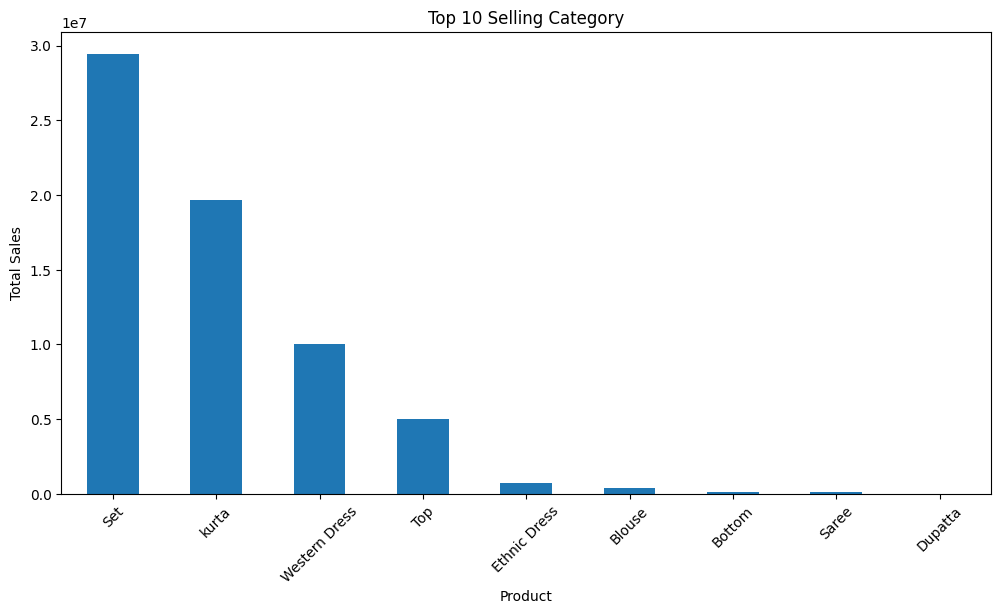

In [71]:
top_products = df.groupby('Category')['Sales'].sum().nlargest(10)

# Plot the top-selling products
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Category')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

### the highest category sales was set

### Ploting top 10 states by sales

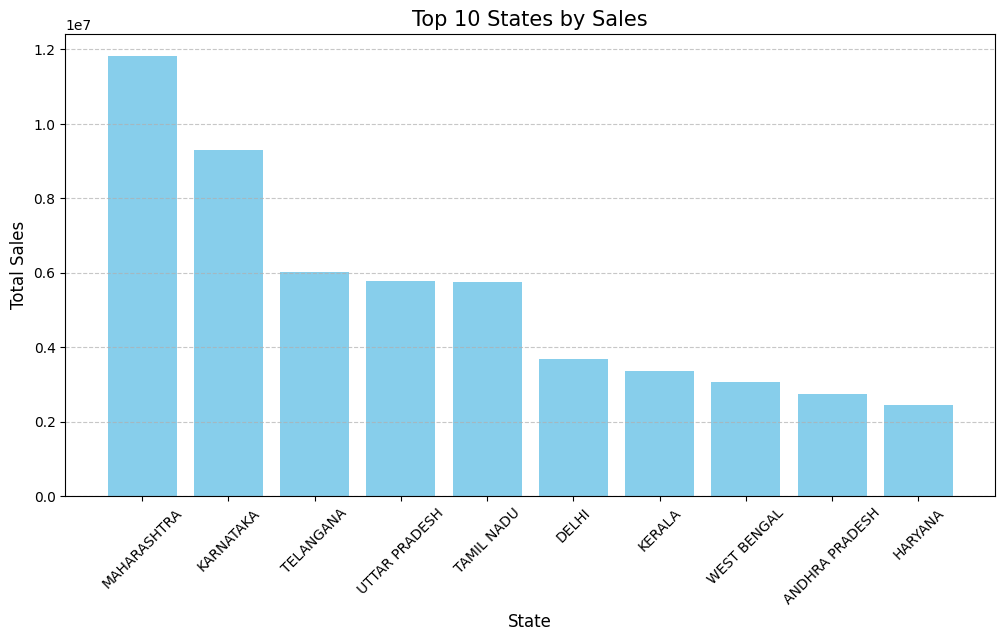

In [72]:
state_sales = df.groupby('ship-state')['Sales'].sum().reset_index()
top_10_state_sales = state_sales.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_state_sales['ship-state'], top_10_state_sales['Sales'], color='skyblue')

plt.title('Top 10 States by Sales', fontsize=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.show()

### The highest sales state was Maharashtra

### Ploting the Courier status Distribution

In [73]:
courier_status_counts = df['Courier Status'].value_counts(normalize=True).reset_index()
courier_status_counts.columns = ['Courier Status', 'Percentage']

    # Create Plotly pie chart
fig = px.pie(
        courier_status_counts,
        names='Courier Status',
        values='Percentage',
        title=f'Courier Status Distribution',
        labels={'Courier Status': 'Courier Status', 'Percentage': 'Percentage'}
    )

fig.update_layout(
        width=800,
        height=600
    )


### the highest percentage was shipped with a big margin difference

In [74]:
top_categories = df.groupby(['Category', 'Size'])['Sales'].sum().nlargest(10).index

### Ploting the top categories an size by sales

In [75]:

top_categories = df.groupby('Category')['Sales'].sum().nlargest(10).index

df_top = df[df.set_index('Category').index.isin(top_categories)]

fig = px.bar(df_top, x='Category', y='Sales', color='Size',
             title='Top Categories and Sizes by Sales',
             labels={'Category': 'Category', 'Sales': 'Sales', 'Size': 'Size'},
             barmode='group',  #
             width=1400, height=600)  


fig.update_layout(
    xaxis={'title': 'Category', 'tickangle': 45, 'showgrid': False},  
    yaxis={'title': 'Sales', 'showgrid': True, 'gridcolor': 'lightgray'},  #
    legend={'title': 'Size', 'x': 1.05, 'y': 0.95},  
    margin={'l': 50, 'r': 50, 't': 100, 'b': 50}, 
    font=dict(size=12),  
)

fig.show()

### Ploting regional sales distributions using geographical visualizations.

In [76]:

df['ship-state'] = df['ship-state'].str.title()
typo_corrections = {
    'Rajsthan': 'Rajasthan',
    'rajsthan': 'Rajasthan',
    'Punjab/Mohali/Zirakpur': 'Punjab',
    'Orissa': 'Odisha',
    'orissa': 'Odisha'
}
df['ship-state'] = df['ship-state'].replace(typo_corrections)

df = df.dropna(subset=['ship-state'])

regional_sales = df.groupby('ship-state')['Sales'].sum().reset_index()

geolocator = Nominatim(user_agent="geoapiExercises")

def get_coordinates(region):
    try:
        location = geolocator.geocode(region + ', India')
        return location.latitude, location.longitude
    except:
        return None, None

latitudes = []
longitudes = []
for region in regional_sales['ship-state']:
    lat, lon = get_coordinates(region)
    latitudes.append(lat)
    longitudes.append(lon)
    time.sleep(1)  

regional_sales['Latitude'] = latitudes
regional_sales['Longitude'] = longitudes

regional_sales = regional_sales.dropna(subset=['Latitude', 'Longitude'])

max_sales = regional_sales['Sales'].max()
scaling_factor = 50 / max_sales  

mean_lat = regional_sales['Latitude'].mean()
mean_lon = regional_sales['Longitude'].mean()

map = folium.Map(location=[mean_lat, mean_lon], zoom_start=5)

for _, row in regional_sales.iterrows():
    radius = row['Sales'] * scaling_factor 
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        popup=f"Region: {row['ship-state']}<br>Sales: ${row['Sales']:,.2f}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(map)

display(map)

### Transforming the categorical varabiles to numeric so model can use it

In [77]:

label=LabelEncoder()

df_encoded = df.apply(lambda x: label.fit_transform(x) if x.dtype == "object" or x.dtype == "bool" else x)

df_encoded.head()

Date  Status  Fulfilment  Sales Channel   ship-service-level  Style  \
0 2022-04-30       0           3               0                   2   1336   
1 2022-04-30       3           3               0                   2    845   
2 2022-04-30       3           0               0                   1    532   
3 2022-04-30       0           3               0                   2    372   
4 2022-04-30       3           0               0                   1    752   

    SKU  Category  Size  ASIN  Courier Status  Qty  Amount  ship-city  \
0  6859         5     7  5471               1  0.0  647.62       4345   
1  4335         8     0  5191               1  1.0  406.00        714   
2  2538         8     8   667               1  1.0  329.00       4857   
3  1683         7     5  4560               1  0.0  753.33       5592   
4  3736         6     0  4274               1  1.0  574.00       1328   

   ship-state  ship-postal-code  promotion-ids  B2B  Sales    Month  
0          17          400081.0           5499    0    0.0  2022-04  
1          12          560085.0           1950    0  406.0  2022-04  
2          17          410210.0           5499    1  329.0  2022-04  
3          22          605008.0           5499    0    0.0  2022-04  
4          28          600073.0           5499    0  574.0  2022-04

### Import the cleaned dataset

In [79]:
df_encoded.to_excel('cleaned_dataset.xlsx', index=False)

### handling imbalance data 

In [278]:

X=df_encoded.drop(columns=["Courier Status","Date","Month"])
y=df_encoded["Courier Status"]

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [279]:
df.head()

Date     Status Fulfilment Sales Channel  ship-service-level    Style  \
0 2022-04-30  Cancelled   Merchant      Amazon.in           Standard   SET389   
1 2022-04-30    Shipped   Merchant      Amazon.in           Standard  JNE3781   
2 2022-04-30    Shipped     Amazon      Amazon.in          Expedited  JNE3371   
3 2022-04-30  Cancelled   Merchant      Amazon.in           Standard    J0341   
4 2022-04-30    Shipped     Amazon      Amazon.in          Expedited  JNE3671   

               SKU       Category Size        ASIN Courier Status  Qty  \
0   SET389-KR-NP-S            Set    S  B09KXVBD7Z        Shipped  0.0   
1  JNE3781-KR-XXXL          kurta  3XL  B09K3WFS32        Shipped  1.0   
2    JNE3371-KR-XL          kurta   XL  B07WV4JV4D        Shipped  1.0   
3       J0341-DR-L  Western Dress    L  B099NRCT7B        Shipped  0.0   
4  JNE3671-TU-XXXL            Top  3XL  B098714BZP        Shipped  1.0   

   Amount    ship-city   ship-state  ship-postal-code  \
0  647.62       MUMBAI  MAHARASHTRA          400081.0   
1  406.00    BENGALURU    KARNATAKA          560085.0   
2  329.00  NAVI MUMBAI  MAHARASHTRA          410210.0   
3  753.33   PUDUCHERRY   PUDUCHERRY          605008.0   
4  574.00      CHENNAI   TAMIL NADU          600073.0   

                                       promotion-ids    B2B  Sales    Month  
0       IN Core Free Shipping 2015/04/08 23-48-5-108  False    0.0  2022-04  
1  Amazon PLCC Free-Financing Universal Merchant ...  False  406.0  2022-04  
2       IN Core Free Shipping 2015/04/08 23-48-5-108   True  329.0  2022-04  
3       IN Core Free Shipping 2015/04/08 23-48-5-108  False    0.0  2022-04  
4       IN Core Free Shipping 2015/04/08 23-48-5-108  False  574.0  2022-04

# Model Prediction


### split the data to train and test data

In [269]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Count of each variable in y_train:")
y_train.value_counts()



Count of each variable in y_train:


0    85184
2    85176
1    85108
Name: Courier Status, dtype: int64

### scale the numeric values

In [270]:
robust = RobustScaler()

for col in X_train.columns:
    X_train[col] = robust.fit_transform(X_train[[col]])
    X_test[col] = robust.transform(X_test[[col]])

### Random forest Classifier

In [271]:
rdf=RandomForestClassifier()
rdf.fit(X_train,y_train)
train_predict=rdf.score(X_train,y_train)
test_predict=rdf.score(X_test,y_test)




In [272]:
print(train_predict,test_predict)

1.0 0.9999686849233563


### the model produced in train pridiction accuracy of 1 and in the test accuracy 0,999

### Feature Importance

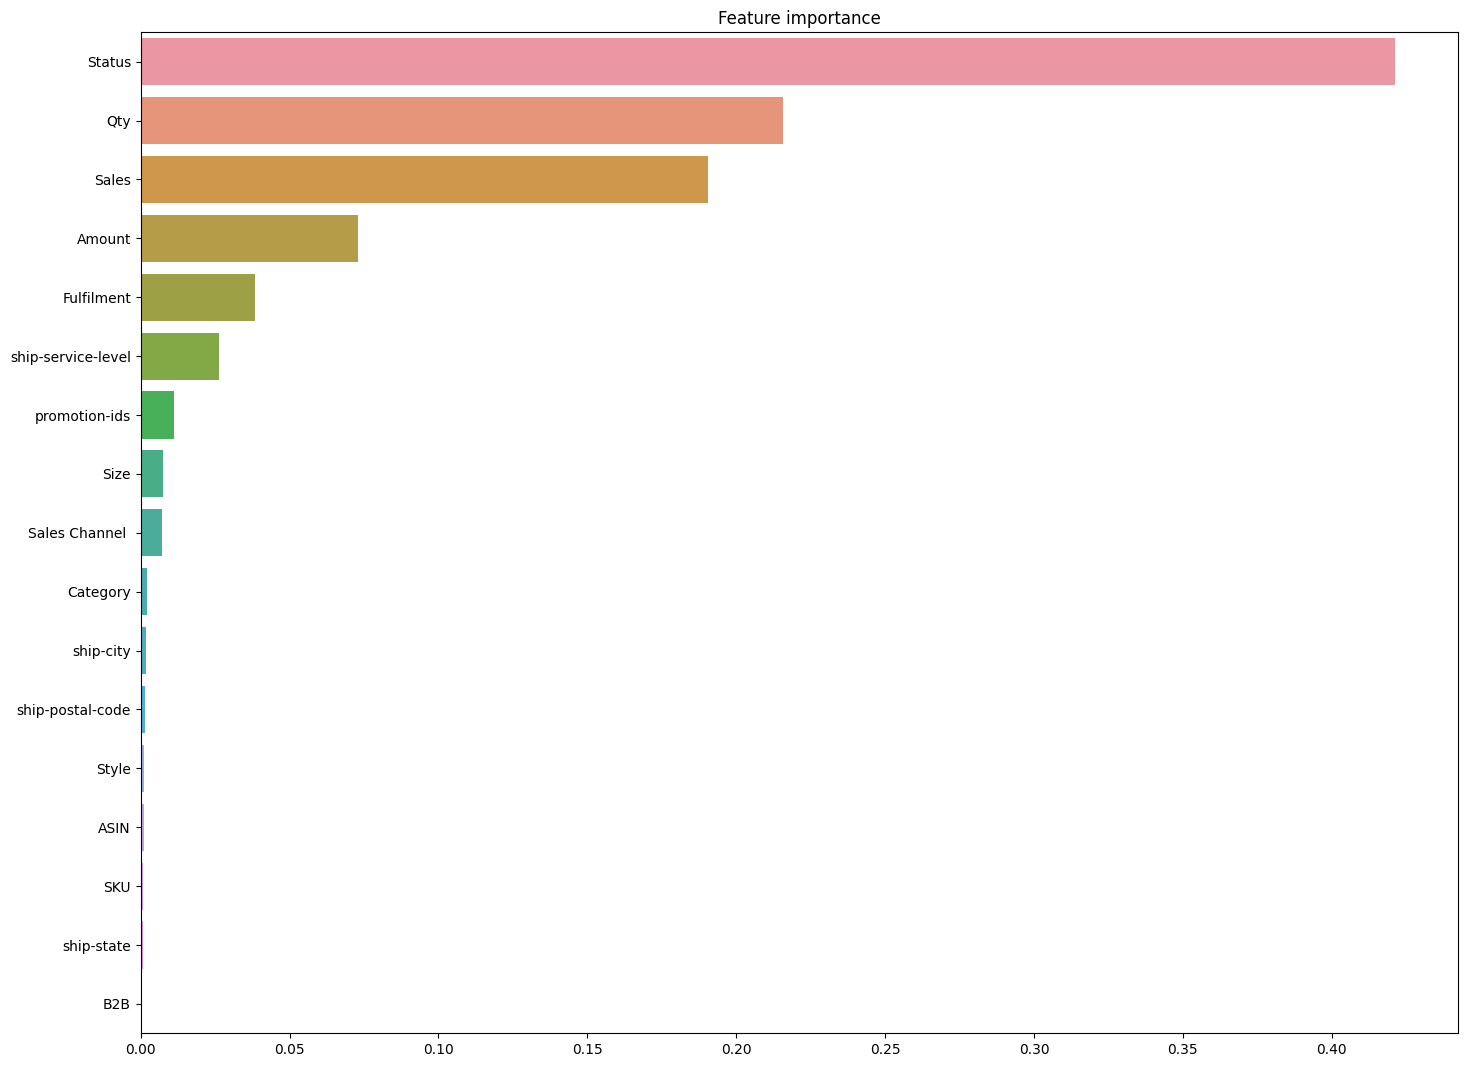

In [273]:
fimp = pd.Series(data=rdf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

### Running multiple model to find the best model

In [274]:
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    # "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
}

model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression accuracy: 0.99
K-Nearest Neighbors accuracy: 0.98
Decision Tree accuracy: 1.00
Random Forest accuracy: 1.00
Gradient Boosting accuracy: 1.00
AdaBoost accuracy: 0.98
Gaussian Naive Bayes accuracy: 0.98
XGBoost accuracy: 1.00


In [276]:
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f"The best model is: {best_model_name} with an accuracy of {accuracies[best_index]:.2f}")

The best model is: Random Forest with an accuracy of 1.00


### Confusion matrix 

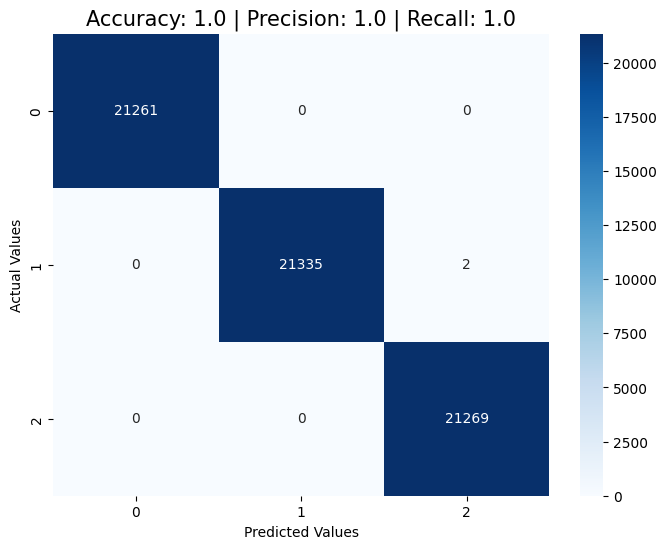

In [277]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

best_model.fit(X_train, y_train)
model_score = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred, average='weighted'), 3)
recall = round(recall_score(y_test, y_pred, average='weighted'), 3)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title(f'Accuracy: {accuracy} | Precision: {precision} | Recall: {recall}', size=15)
plt.show()

# Amazon Sales Dashboard

In [33]:
app = dash.Dash(__name__)

In [34]:
regional_sales = df.groupby('ship-state')['Sales'].sum().reset_index()

In [35]:
Month=list(df['Date'].dt.to_period('M').astype(str).unique())
Month.pop(3)
Month.insert(0, "All")
Month

['All', '2022-04', '2022-03', '2022-05', '2022-06']

In [36]:
app.layout = html.Div(
    [
        html.Div(
            [
                html.H1("Amazon Sales Dashboard", style={'textAlign': 'center', 'marginBottom': '20px'}),
                html.H2("Top 10 Selling Categories", style={'textAlign': 'center', 'marginBottom': '20px'}),
                html.Div(
                    [
                        dcc.Dropdown(
                            id='region-dropdown',
                            options=[{'label': region, 'value': region} for region in regional_sales['ship-state'].unique()],
                            value=regional_sales['ship-state'].iloc[0],  # Default value
                            clearable=False,
                            style={'width': '45%', 'marginRight': '10px'}
                        ),
                        dcc.Dropdown(
                            id='month-dropdown',
                            options=[{'label': month, 'value': month} for month in Month],
                            value='All',  # Default value
                            clearable=False,
                            style={'width': '45%'}
                        )
                    ],
                    style={'display': 'flex', 'justifyContent': 'center', 'marginBottom': '20px'}
                ),
                html.Div(id='total-sales', style={'textAlign': 'center', 'fontWeight': 'bold', 'fontSize': '20px'}),
            ],
            style={'padding': '20px', 'borderRadius': '10px', 'width': '100%'}
        ),
        html.Div(
            [
                dcc.Graph(id="bar-chart"),
                dcc.Graph(id="line-chart"),
                dcc.Graph(id="pie-chart"),
                dcc.Graph(id="gropedBar-chart")
            ],
            style={'display': 'flex', 'flexDirection': 'row', 'alignItems': 'center', 'flexWrap': 'wrap'}
        )
    ],
    style={'padding': '40px', 'fontFamily': 'Arial, sans-serif', 'backgroundColor': '#f9f9f9'}
)
 

In [37]:
@app.callback(
    Output("total-sales", "children"),
    [Input("region-dropdown", "value"), Input("month-dropdown", "value")]
)
def update_total_sales(region, month):
    filtered_df = df[df['ship-state'] == region]
    
    if month != 'All':
        filtered_df = filtered_df[df['Date'].dt.to_period('M').astype(str) == month]

    total_sales = filtered_df['Sales'].sum()
    return f"Total Sales in {region} for {month}: ${total_sales:,.2f}"

In [38]:


@app.callback(Output("bar-chart","figure"),[Input('region-dropdown', 'value'),
     Input('month-dropdown', 'value')])
def serve_bar_chart(region, selected_month):

    filtered_df = df[df['ship-state'] == region]
    if selected_month != 'All':
     filtered_df = filtered_df[filtered_df['Date'].dt.to_period('M').astype(str) == selected_month]
    

 
    top_products = filtered_df.groupby('Category')['Sales'].sum().nlargest(10).reset_index()

    fig = px.bar(
        top_products,
        x='Category',
        y='Sales',
        title=f'Top 10 Selling Categories in {region}',
        labels={'Category': 'Category', 'Sales': 'Total Sales'}
    )

    fig.update_layout(
        xaxis_title='Category',
        yaxis_title='Total Sales',
        xaxis_tickangle=45,
         width=650,
        height=450
    )


    
    return fig

In [39]:
@app.callback(
    Output("pie-chart", "figure"),
   [Input('region-dropdown', 'value'),
     Input('month-dropdown', 'value')])


def serve_pie_chart(region, selected_month):
    # Filter data based on the selected region
    filtered_df = df[df['ship-state'] == region]
    if selected_month != 'All':
     filtered_df = filtered_df[filtered_df['Date'].dt.to_period('M').astype(str) == selected_month]
    # Calculate the percentage distribution of courier statuses
    courier_status_counts = filtered_df['Courier Status'].value_counts(normalize=True).reset_index()
    courier_status_counts.columns = ['Courier Status', 'Percentage']

    # Create Plotly pie chart
    fig = px.pie(
        courier_status_counts,
        names='Courier Status',
        values='Percentage',
        title=f'Courier Status Distribution in {region}',
        labels={'Courier Status': 'Courier Status', 'Percentage': 'Percentage'}
    )

    fig.update_layout(
        width=650,
        height=450
    )

    return fig

In [40]:
   




@app.callback(
    Output("gropedBar-chart", "figure"),
[Input('region-dropdown', 'value'),
     Input('month-dropdown', 'value')])
def serve_gropedBar_chart(region, selected_month):
    # Filter data based on the selected region
    filtered_df = df[df['ship-state'] == region]
    if selected_month != 'All':
     filtered_df = filtered_df[filtered_df['Date'].dt.to_period('M').astype(str) == selected_month]

    # Compute top 10 selling categories for the filtered data
    top_categories = filtered_df.groupby('Category')['Sales'].sum().nlargest(10).index
    df_top = filtered_df[filtered_df.set_index('Category').index.isin(top_categories)]

    # Create Plotly bar plot with custom colors
    fig = px.bar(
        df_top, 
        x='Category', 
        y='Sales', 
        color='Size',
        title='Top Categories and Sizes by Sales',
        labels={'Category': 'Category', 'Sales': 'Sales', 'Size': 'Size'},
        barmode='group',  # To group bars by 'Category'
        width=1250, 
        height=600  # Larger figure size
    )

    # Update layout for better visualization
    fig.update_layout(
        xaxis={'title': 'Category', 'tickangle': 45, 'showgrid': False},  # Rotate x-axis labels for better readability
        yaxis={'title': 'Sales', 'showgrid': True, 'gridcolor': 'lightgray'},  # Show light gray gridlines on y-axis
        legend={'title': 'Size', 'x': 1.05, 'y': 0.95},  # Adjust legend position
        margin={'l': 50, 'r': 50, 't': 100, 'b': 50},  # Adjust margins
        font=dict(size=12)  # Adjust font size
    )

    return fig


In [41]:
@app.callback(Output("line-chart","figure"),[Input('region-dropdown', 'value'),
     Input('month-dropdown', 'value')])
def serve_line_chart(region, selected_month):

    filtered_df = df[df['ship-state'] == region]
    if selected_month != 'All':
     filtered_df = filtered_df[filtered_df['Date'].dt.to_period('M').astype(str) == selected_month]

    # Extract month from the date and aggregate monthly sales
    filtered_df['Month'] = filtered_df['Date'].dt.to_period('M')
    monthly_sales = filtered_df.groupby('Month')['Sales'].sum().reset_index()

    # Convert the Period to string for Plotly
    monthly_sales['Month'] = monthly_sales['Month'].astype(str)

    # Create Plotly line plot
    fig = px.line(
        monthly_sales,
        x='Month',
        y='Sales',
        title=f'Monthly Sales Trends in {region}',
        labels={'Month': 'Month', 'Sales': 'Total Sales'}
    )

    fig.update_layout(
        xaxis_title='Month',
        yaxis_title='Total Sales',
        width=650,
        height=450,
        xaxis_tickangle=45
    )
    return fig

In [42]:
if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_25856\1674730244.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

